In [3]:
#plot generator

def density(
    z,
    x_array,
    y_array,
    x_label=None,
    y_label=None,
    data_label=None,
    title=None,
    fig_ax=None,
    process_fun=None,
    z_min_max=None,
    norm_fun=None,
    show_values=False,
    **kwargs,
):
    """
    norm_fun should typically be: lambda (z_min, z_max): SymLogNorm(1e-9, 1.0, vmin=z_min, vmax=z_max)
    with: from matplotlib.colors import LogNorm, SymLogNorm
    """
    global global_fig, global_axes
 
    fig, ax = fig_ax or plt.subplots(1, 1, 
            # figsize=(14,12)
            )
    global_fig, global_axes = fig, ax
 
    x, y = np.meshgrid(x_array, y_array)
 
    z = np.ma.array(z)
 
    if process_fun is not None:
        z = process_fun(z)
 
    if z_min_max is not None and not callable(z_min_max):
        z_min = np.nanmin(z) if z_min_max[0] is None else z_min_max[0]
        z_max = np.nanmax(z) if z_min_max[1] is None else z_min_max[1]
    else:
        z_min, z_max = np.nanmin(z), np.nanmax(z)
 
    print(z_min, z_max)
 
    norm = None
    if norm_fun is not None:
        norm = norm_fun(z_min, z_max)
        z_min, z_max = None, None
 
    # extent=[x_array[0], x_array[-1], y_array[0], y_array[-1]]
    # im = ax.imshow(z.T,
    # interpolation=None,
    # cmap="jet",
    # origin='lower',
    # vmin=z_min, vmax=z_max,
    # # extent=extent,
    # aspect='auto',
    # **kwargs
    # )
 
    im = ax.pcolormesh(
        x_array,
        y_array,
        z.T,
        cmap="jet",
        vmin=z_min,
        vmax=z_max,
        norm=norm,
        shading="auto",
        **kwargs,
    )
 
    c1 = fig.colorbar(im, ax=ax)
    c1.ax.set_title(data_label, fontsize=12)
 
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
 
    ax.set_title(title)
 
    return fig, ax

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
fidelity_results = [
    [0.8090026837385503, 0.8599827217078951, 0.9037252869761155, 0.939811799020068,
     0.9660313698241098, 0.9826916375348361, 0.9874138605919957, 0.9825189112621638],
    [0.8372252386675871, 0.884940566700156, 0.9245070503880619, 0.9557840015994916,
     0.9766403072080377, 0.9876205128226528, 0.9865043646947539, 0.9758105005910468],
    [0.8627797123710446, 0.9066748729396643, 0.9416061475735368, 0.9677146545141606,
     0.9829713798916894, 0.9881483860746044, 0.9812096317109628, 0.9648373516333622],
    [0.8852786523117127, 0.9248606960409963, 0.9547728891827862, 0.9754359895638961,
     0.9849440900812318, 0.9842834345164256, 0.9716253896952374, 0.9497798750600904],
    [0.9043854544804982, 0.9392325928103373, 0.9638232441118361, 0.9788498320788387,
     0.982548988688222, 0.9761044039510973, 0.9579151345803822, 0.9308820346410688],
    [0.9198209798319145, 0.9495894697424861, 0.9686417889562421, 0.9779286985368002,
     0.9758469861906255, 0.9637582508232144, 0.940306242983114, 0.9084460254710961],
]


In [19]:
omega_d_array = [3.19991027, 3.20391027, 3.20791027, 3.21191027, 3.21591027, 3.21991027]


In [20]:
t_g_array = [24.2, 24.25714286, 24.31428571, 24.37142857, 24.42857143, 24.48571429, 24.54285714, 24.6]


In [26]:
#best output from e5 scale qcap

t_g_array = [
    24.4, 24.41428571, 24.42857143, 24.44285714,
    24.45714286, 24.47142857, 24.48571429, 24.5
]

omega_d_array = [
    3.20491027, 3.20691027, 3.20891027, 3.21091027, 3.21291027, 3.21491027
]

# Omega by time dimensions are 6 by 8

fidelity_results = [
    [0.9703599669024117, 0.9748563654837925, 0.9786284815282721, 0.9817947133742525,
     0.9844772039647167, 0.9866641411093976, 0.9881659754954386, 0.9887563951666208],
    [0.9749493210029426, 0.9787387815655677, 0.9817952770484645, 0.9842404253312115,
     0.9861985723029623, 0.9876582531771625, 0.9884297827709180, 0.9882883246139657],
    [0.9784683890307521, 0.9815413229949974, 0.9838747371898767, 0.9855930904333262,
     0.9868225256101951, 0.9875519365791274, 0.9875920923289607, 0.9867203482361790],
    [0.9809059855591369, 0.9832555806473087, 0.9848612387340280, 0.9858498703934763,
     0.9863490036084067, 0.9863479031224959, 0.9856583820966852, 0.9840606939763336],
    [0.9822553640915723, 0.9838775946720553, 0.9847536087183176, 0.9850123708693008,
     0.9847823787256195, 0.9840532814118984, 0.9826385230712993, 0.9803219473017317],
    [0.9825142227950804, 0.9834078463347020, 0.9835551026190775, 0.9830866061859501,
     0.9821314076792268, 0.9806795555026623, 0.9785467052217122, 0.9755209646511865]
]

# z_min = 0.9703599669024117
# z_max = 0.9887563951666208


0.9703599669024117 0.9887563951666208


(<Figure size 640x480 with 2 Axes>, <Axes: >)

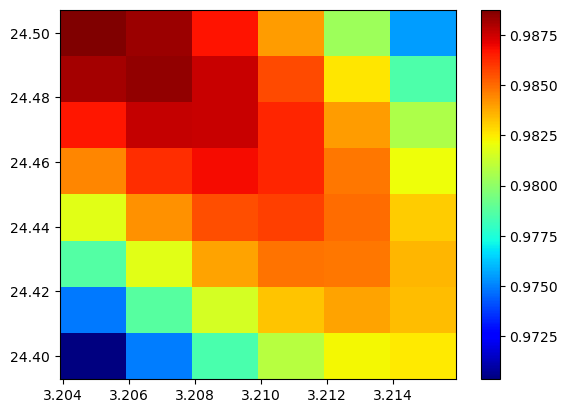

In [27]:
fidelity_results = np.asarray(fidelity_results,dtype = float)

density(fidelity_results, omega_d_array, t_g_array)

0.9793751607209571 0.9980729773377685


(<Figure size 640x480 with 2 Axes>, <Axes: >)

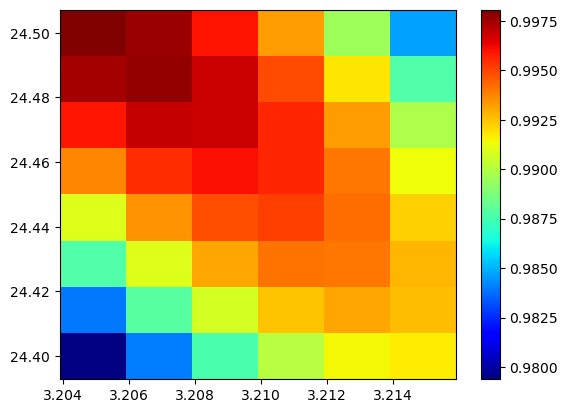

In [28]:
#1e6 qcap

t_g_array = [
    24.4, 24.41428571, 24.42857143, 24.44285714,
    24.45714286, 24.47142857, 24.48571429, 24.5
]

omega_d_array = [
    3.20491027, 3.20691027, 3.20891027, 3.21091027, 3.21291027, 3.21491027
]

# Omega by time dimensions are 6 by 8

fidelity_results = [
    [0.9793751607209571, 0.983940896922339, 0.9877709120412076, 0.9909861629890558,
     0.9937120857782465, 0.99593723627498, 0.9974680619731497, 0.9980729773377685],
    [0.9840297959227543, 0.9878785713617729, 0.9909827915052752, 0.9934666954576272,
     0.9954579682136341, 0.9969455126411636, 0.9977356230009432, 0.9975982071519712],
    [0.9875989160573093, 0.9907209966089877, 0.9930918493972557, 0.9948386091779303,
     0.996090793194163, 0.9968376608015874, 0.9968859555226625, 0.9960078118227331],
    [0.9900711768374869, 0.9924596440091343, 0.9940923826233897, 0.9950990256433961,
     0.9956104997417606, 0.9956164313329768, 0.9949246157418337, 0.9933101369144605],
    [0.9914397359484347, 0.9930904975157026, 0.9939832016579212, 0.9942495734938605,
     0.9940215226930019, 0.9932890545807432, 0.9918616156217156, 0.9895179477315846],
    [0.9917022589561423, 0.9926140453389278, 0.99276760842449, 0.9922963528079908,
     0.9913327435926661, 0.989867178404589, 0.9877113477240321, 0.9846483415497103]
]

# z_min = 0.9793751607209571
# z_max = 0.9980729773377685

fidelity_results = np.asarray(fidelity_results,dtype = float)

density(fidelity_results, omega_d_array, t_g_array)

0.9802856739705463 0.9990139376031474


(<Figure size 640x480 with 2 Axes>, <Axes: >)

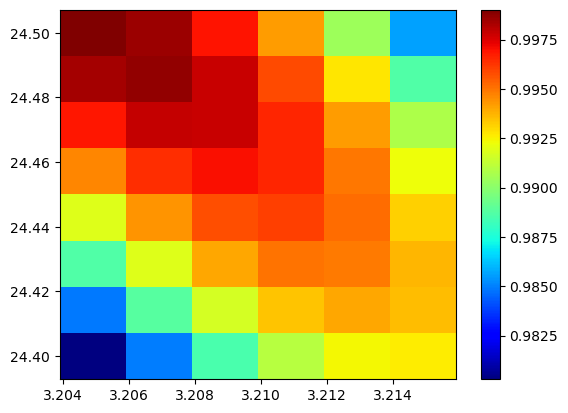

In [29]:
#1e7 qcap

t_g_array = [
    24.4, 24.41428571, 24.42857143, 24.44285714,
    24.45714286, 24.47142857, 24.48571429, 24.5
]

omega_d_array = [
    3.20491027, 3.20691027, 3.20891027, 3.21091027, 3.21291027, 3.21491027
]

# Omega by time dimensions are 6 by 8

fidelity_results = [
    [0.9802856739705463, 0.9848584101817774, 0.9886942703018976, 0.9919144702205429,
     0.9946447798738468, 0.9968737929726746, 0.9984075520334095, 0.9990139376031474],
    [0.9849468930226998, 0.9888016578062285, 0.9919106969799415, 0.9943985149257567,
     0.9963931352351464, 0.9978834985882904, 0.9986754924856758, 0.9985384926623094],
    [0.9885210614317512, 0.9916481059997206, 0.9940227405813129, 0.9957723707266005,
     0.9970268558644122, 0.9977754929307562, 0.9978246181929146, 0.9969458374868218],
    [0.9909968189020565, 0.9933892140279932, 0.9950246899147496, 0.9960331550301254,
     0.9965458806933993, 0.9965525304902446, 0.9958604932447132, 0.9942443294828163],
    [0.9923673134642003, 0.9940209601933295, 0.9949153538219213, 0.9951824988176982,
     0.9949546508480295, 0.9942218518517995, 0.9927931438146246, 0.9904467520955574],
    [0.9926302073748553, 0.9935438333807686, 0.9936980388692885, 0.9932265107883147,
     0.9922620604504147, 0.9907951213860692, 0.9886369828936482, 0.9855702268669798]
]

# z_min = 0.9802856739705463
# z_max = 0.9990139376031474

fidelity_results = np.asarray(fidelity_results,dtype = float)

density(fidelity_results, omega_d_array, t_g_array)